In [1]:
import pickle as pkl

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

from gensim.models.doc2vec import Doc2Vec
from hdbscan import HDBSCAN
from sklearn.decomposition import PCA, TruncatedSVD

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.autolayout"] = True

In [2]:
data_dir = Path(Path.cwd().parent, 'data/interim')
labels_dir = Path(data_dir, 'labels_0')
models_dir = Path(Path.cwd().parent, 'models')

In [13]:
vectors = {path.stem[4:]:Doc2Vec.load(str(path)).dv.vectors for path in models_dir.glob('d2v*.model')}

In [12]:
vectors

{'chains_ge_4_lt_10_50': array([[ 2.7695022 ,  1.9194885 ,  0.39241394, ...,  0.1506073 ,
         -0.2236442 , -0.5612311 ],
        [ 1.4639499 ,  0.9365255 , -2.10412   , ...,  0.08225302,
          0.2813851 ,  1.0030582 ],
        [-0.25853905, -0.07214684, -1.3360916 , ...,  0.0579797 ,
         -0.3268341 ,  0.6757018 ],
        ...,
        [ 1.6386883 ,  0.14310147, -0.6199963 , ...,  0.15319872,
         -0.8825423 , -0.02606515],
        [-0.14553379,  1.0467051 , -1.0325403 , ...,  0.17116383,
         -0.7036911 ,  0.6426259 ],
        [ 2.1944296 ,  1.5890048 ,  0.00433709, ..., -2.51374   ,
          0.95395434,  2.3806236 ]], dtype=float32),
 'chains_ge_4_lt_10_300': array([[-1.400305  , -0.6341875 , -0.52940136, ...,  0.40754515,
         -0.42688423,  0.35783422],
        [-0.23157404,  0.34123546, -0.25735816, ..., -0.64438903,
         -0.5302187 ,  0.37454998],
        [ 0.03411685, -0.4671587 , -0.10246654, ..., -0.4782551 ,
         -0.5049981 ,  0.38951   ],
   

In [6]:
best_km_sl_names = ['labels_km_chains_eq_3_300_02_euclidean',
 'labels_km_chains_ge_10_50_02_euclidean',
 'labels_km_chains_eq_3_50_02_euclidean',
 'labels_km_chains_ge_4_lt_10_300_02_euclidean',
 'labels_km_chains_ge_10_300_02_euclidean',
 'labels_km_chains_ge_4_lt_10_50_02_euclidean']

In [28]:
def read_pickle(path):
    with open(path, 'rb') as handle:
        file = pkl.load(handle)
    return np.asarray(file)

In [29]:
clusters = {'_'.join(path.stem.split('_')[2:-2]):read_pickle(path) for path in labels_dir.iterdir() if path.stem in best_km_sl_names}

In [30]:
clusters

{'chains_eq_3_50': array([1, 1, 1, ..., 0, 0, 0]),
 'chains_ge_10_300': array([0, 0, 0, ..., 1, 0, 1]),
 'chains_ge_4_lt_10_50': array([0, 0, 0, ..., 0, 0, 0]),
 'chains_ge_4_lt_10_300': array([0, 0, 0, ..., 0, 0, 0]),
 'chains_ge_10_50': array([1, 0, 0, ..., 1, 1, 1]),
 'chains_eq_3_300': array([0, 0, 0, ..., 0, 0, 0])}

In [31]:
for dat in data_dir.glob('*.pkl'):
    print(dat)

/home/miguel/Projects/tfm-nlp/data/interim/tagged_docs_300_chains_ge_4_lt_10.pkl
/home/miguel/Projects/tfm-nlp/data/interim/tagged_docs_50_chains_eq_2.pkl
/home/miguel/Projects/tfm-nlp/data/interim/tagged_docs_300_chains_eq_3.pkl
/home/miguel/Projects/tfm-nlp/data/interim/parsed_emails_chains_eq_2.pkl
/home/miguel/Projects/tfm-nlp/data/interim/parsed_emails_chains_ge_10.pkl
/home/miguel/Projects/tfm-nlp/data/interim/parsed_emails_chains_gt_1.pkl
/home/miguel/Projects/tfm-nlp/data/interim/tagged_docs_300_chains_ge_10.pkl
/home/miguel/Projects/tfm-nlp/data/interim/parsed_emails_chains_ge_4_lt_10.pkl
/home/miguel/Projects/tfm-nlp/data/interim/tagged_docs_300_chains_gt_1.pkl
/home/miguel/Projects/tfm-nlp/data/interim/tagged_docs_300_chains_eq_2.pkl
/home/miguel/Projects/tfm-nlp/data/interim/parsed_emails_chains_eq_3.pkl


In [55]:
df_ge4 = pd.read_pickle('/home/miguel/Projects/tfm-nlp/data/interim/parsed_emails_chains_ge_4_lt_10.pkl')

In [58]:
df_ge4['cluster'] = df_labs

In [61]:
df_ge4[df_ge4['cluster']>-1]

,Message,Reply,Chain,Chain_len,Subject,Sender,Recipients,Timestamp,cluster
33998,37176,True,130927,6,Re:,matthew.lenhart@enron.com,paul.lucci@enron.com,968165640,1
37774,713-853-0977,False,80214,6,Give me a call,eric.bass@enron.com,jason.bass2@compaq.com,969468240,1
38249,>,False,113441,5,FW: My concern,stouchstone@natsource.com,sandra.f.brawner@enron.com,969627600,1
39141,7,True,212445,7,Re: how have you been stranger???/,matthew.lenhart@enron.com,stadogb@email.msn.com,969988020,1
43519,713-853-6203,True,125007,4,Re:,mike.carson@enron.com,cjackson@txuenergy.com,971440800,1
51802,by when ?,True,133567,4,RE: OK,joe.quenet@enron.com,rebecca.quenet@eds.com,973863840,0
62477,O.K.,True,75803,6,RE: Friday Evening,pyoung@cliverunnells.com,tana.jones@enron.com,976287780,1
63918,Will do.,True,147147,4,Re: Presentations from GA Meeting on December 8,jeff.dasovich@enron.com,richard.shapiro@enron.com,976619040,0
70673,inagoodmoodarewe?,True,191866,4,"Re: USAEE ""Dialogue"" Supplement",jennifer.fraser@enron.com,jeffrey.shankman@enron.com,979040820,1
74206,83,True,17754,4,Re: BNP PARIBAS Commodity Futures Weekly AGA S...,john.arnold@enron.com,michael.byrne@americas.bnpparibas.com,980323620,1


In [11]:
for path in Path(models_dir).glob('d2v*.model'):
    print(path)

/home/miguel/Projects/tfm-nlp/models/d2v_chains_ge_4_lt_10_50.model
/home/miguel/Projects/tfm-nlp/models/d2v_chains_ge_4_lt_10_300.model
/home/miguel/Projects/tfm-nlp/models/d2v_chains_eq_2_300.model
/home/miguel/Projects/tfm-nlp/models/d2v_chains_ge_10_300.model
/home/miguel/Projects/tfm-nlp/models/d2v_chains_ge_10_50.model
/home/miguel/Projects/tfm-nlp/models/d2v_chains_eq_3_50.model
/home/miguel/Projects/tfm-nlp/models/d2v_chains_eq_2_50.model
/home/miguel/Projects/tfm-nlp/models/d2v_chains_eq_3_300.model


In [13]:
d2vec = Doc2Vec.load('/home/miguel/Projects/tfm-nlp/models/d2v_chains_ge_4_lt_10_300.model').dv.vectors

In [23]:
len(d2vec)

9676

In [ ]:
clusters = 

In [17]:
pca = PCA(n_components=2)
X = pca.fit_transform(d2vec)
sum(pca.explained_variance_ratio_)

0.06073138676583767

In [21]:
pca = PCA()
X = pca.fit_transform(d2vec)
sum(pca.explained_variance_ratio_)

256.4158363714814

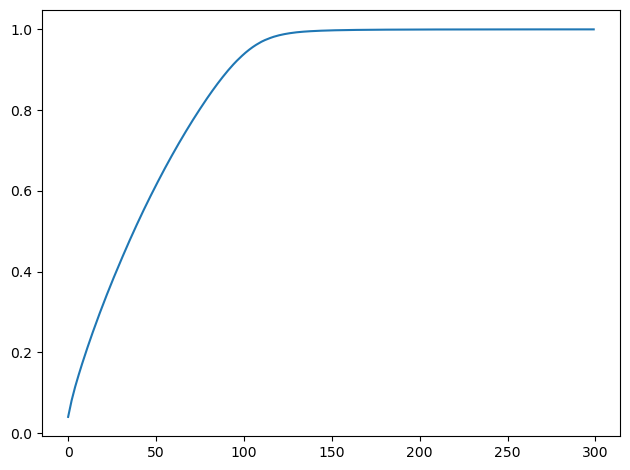

In [22]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [18]:
tsvd = TruncatedSVD(n_components=2)
Y = tsvd.fit_transform(d2vec)
sum(tsvd.explained_variance_ratio_)

0.06014697067439556